# *TASK-4 Exploratory Data Analysis - GLOBAL TERRORISM*

## *By-Gaura Yadav*                

# Import important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the Data

## *load the csv file*

In [2]:
data=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## *Histogram*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C18DF65E50>,
      dtype=object)

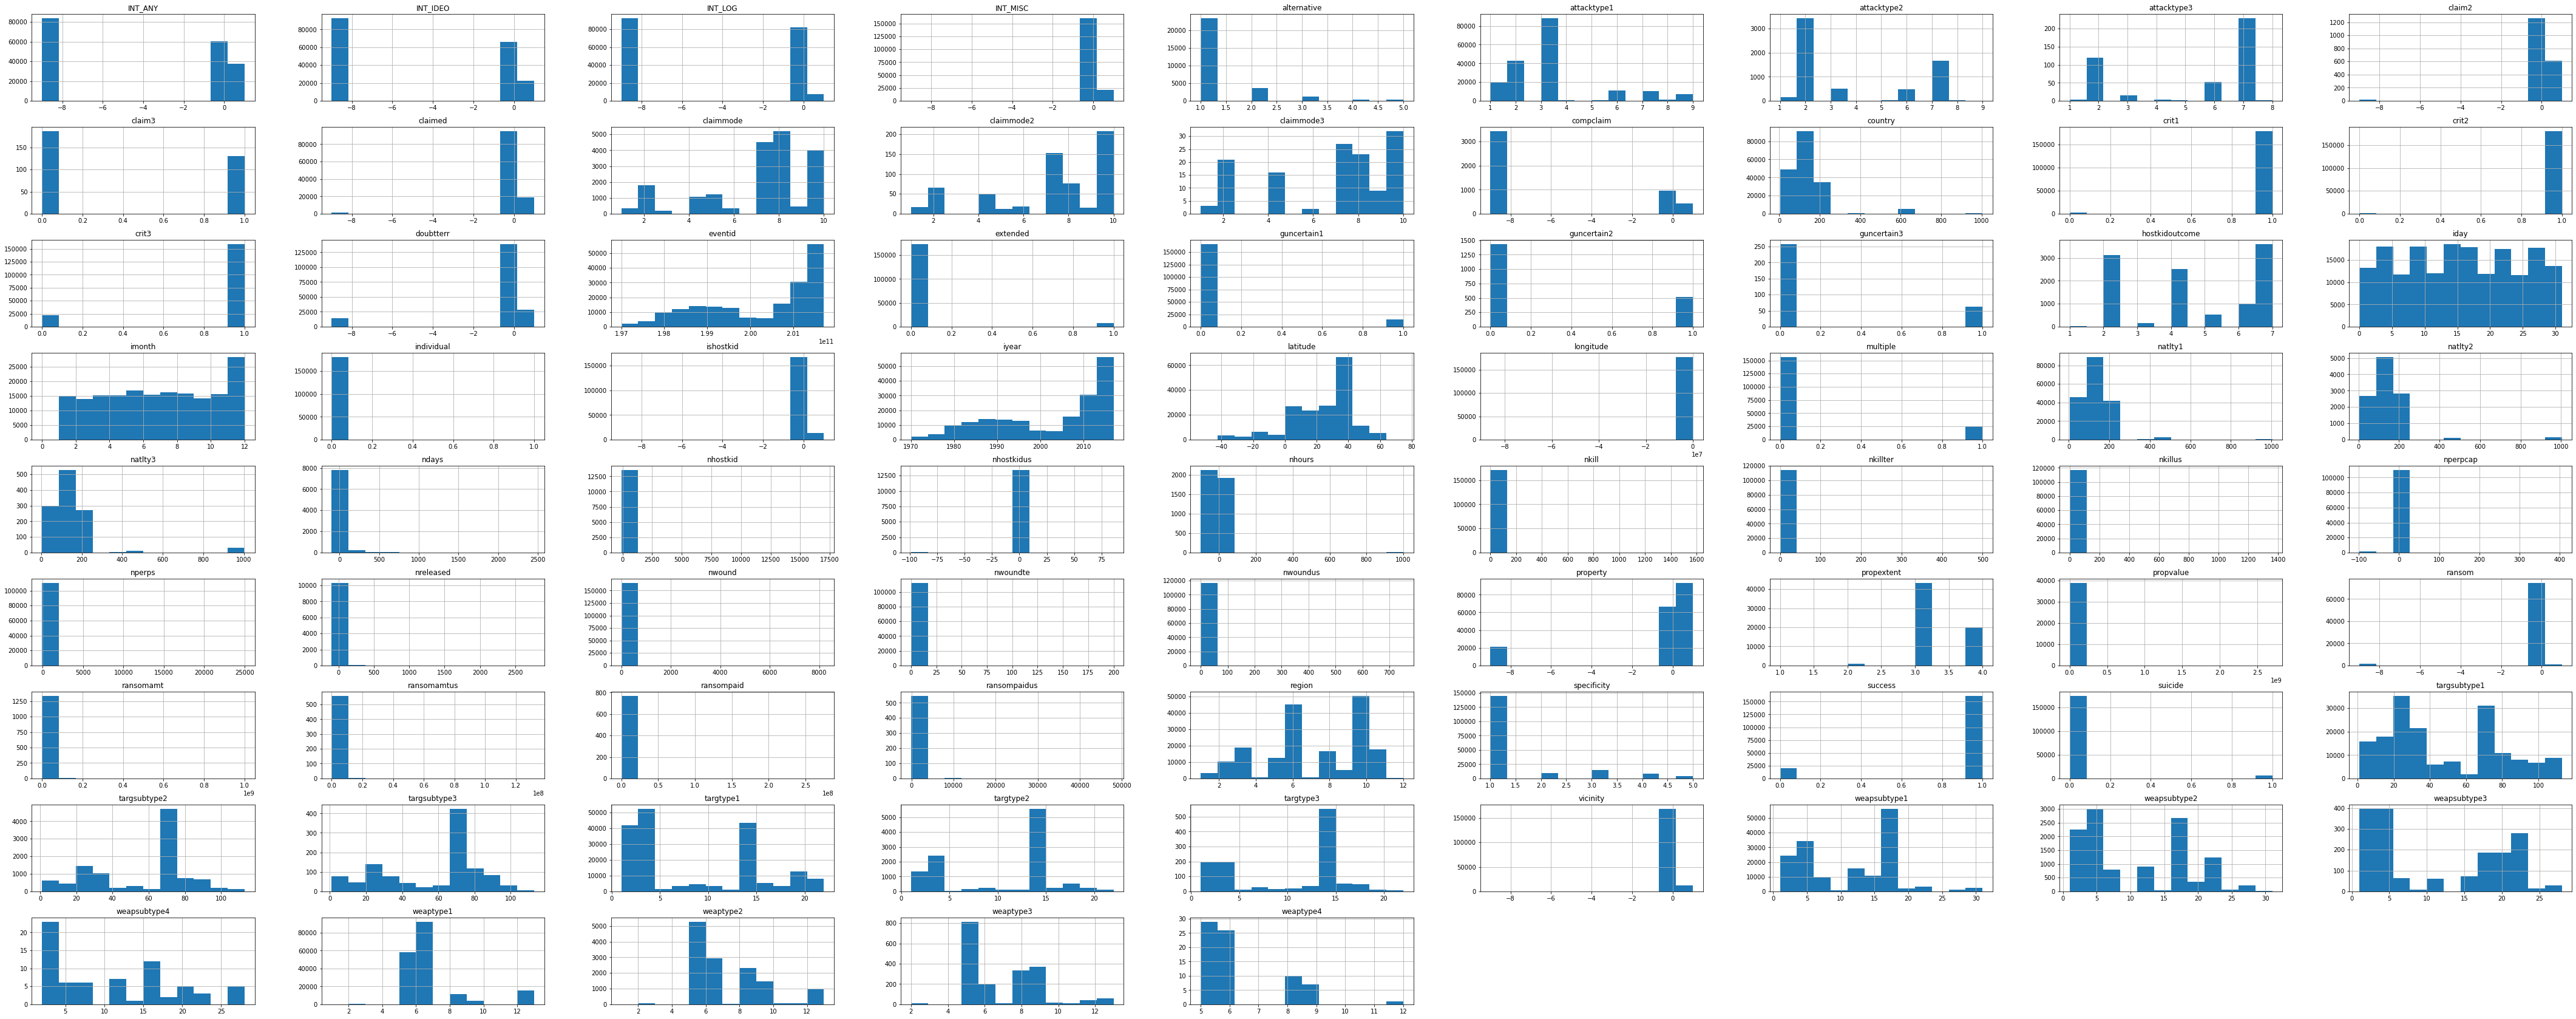

In [4]:
data.hist(bins=12,figsize=(75,30))

# Data Preprocessing

## *check the null values in original dataset*

In [5]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

## *Extract the list of all columns from original dataset*

In [ ]:
list(data.columns)

## *Rename Of Columns*

In [7]:
data.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'countries','gname':'group','provstate':'state',
                     'city':'city','latitude':'latitude','longitude':'longitude','summary':'summary',
                     'attacktype1_txt':'attacktype','targtype1_txt':'targtype','weaptype1_txt':'weapon',
                     'region_txt':'regions','nkill':'kills','nwound':'wound'},inplace=True)

## *Create a new variable data1 and put some limited columns inside that*

In [8]:
data1=data[['year','month','day','group','kills','countries','wound','weapon','targtype','attacktype','regions','summary','longitude','latitude','city','state']]

In [9]:
data1.head()

,year,month,day,group,kills,countries,wound,weapon,targtype,attacktype,regions,summary,longitude,latitude,city,state
0,1970,7,2,MANO-D,1.0,Dominican Republic,0.0,Unknown,Private Citizens & Property,Assassination,Central America & Caribbean,NaN,-69.951164,18.456792,Santo Domingo,NaN
1,1970,0,0,23rd of September Communist League,0.0,Mexico,0.0,Unknown,Government (Diplomatic),Hostage Taking (Kidnapping),North America,NaN,-99.086624,19.371887,Mexico city,Federal
2,1970,1,0,Unknown,1.0,Philippines,0.0,Unknown,Journalists & Media,Assassination,Southeast Asia,NaN,120.599741,15.478598,Unknown,Tarlac
3,1970,1,0,Unknown,NaN,Greece,NaN,Explosives,Government (Diplomatic),Bombing/Explosion,Western Europe,NaN,23.762728,37.997490,Athens,Attica
4,1970,1,0,Unknown,NaN,Japan,NaN,Incendiary,Government (Diplomatic),Facility/Infrastructure Attack,East Asia,NaN,130.396361,33.580412,Fukouka,Fukouka


## *Check the null values in data1*

In [12]:
data1.isnull().sum()

year              0
month             0
day               0
group             0
kills         10313
countries         0
wound         16311
weapon            0
targtype          0
attacktype        0
regions           0
summary       66129
longitude      4557
latitude       4556
city            434
state           421
dtype: int64

# Handel missing values

### *Now replacing null values with '0'*

In [13]:
data1=data1.replace(np.NaN,'0')
data1

,year,month,day,group,kills,countries,wound,weapon,targtype,attacktype,regions,summary,longitude,latitude,city,state
0,1970,7,2,MANO-D,1,Dominican Republic,0,Unknown,Private Citizens & Property,Assassination,Central America & Caribbean,0,-69.9512,18.4568,Santo Domingo,0
1,1970,0,0,23rd of September Communist League,0,Mexico,0,Unknown,Government (Diplomatic),Hostage Taking (Kidnapping),North America,0,-99.0866,19.3719,Mexico city,Federal
2,1970,1,0,Unknown,1,Philippines,0,Unknown,Journalists & Media,Assassination,Southeast Asia,0,120.6,15.4786,Unknown,Tarlac
3,1970,1,0,Unknown,0,Greece,0,Explosives,Government (Diplomatic),Bombing/Explosion,Western Europe,0,23.7627,37.9975,Athens,Attica
4,1970,1,0,Unknown,0,Japan,0,Incendiary,Government (Diplomatic),Facility/Infrastructure Attack,East Asia,0,130.396,33.5804,Fukouka,Fukouka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Al-Shabaab,1,Somalia,2,Firearms,Military,Armed Assault,Sub-Saharan Africa,12/31/2017: Assailants opened fire on a Somali...,45.385,2.35967,Ceelka Geelow,Middle Shebelle
181687,2017,12,31,Muslim extremists,2,Syria,7,Explosives,Military,Bombing/Explosion,Middle East & North Africa,12/31/2017: Assailants launched mortars at the...,35.9427,35.4073,Jableh,Lattakia
181688,2017,12,31,Bangsamoro Islamic Freedom Movement (BIFM),0,Philippines,0,Incendiary,Private Citizens & Property,Facility/Infrastructure Attack,Southeast Asia,12/31/2017: Assailants set fire to houses in K...,124.438,6.90074,Kubentog,Maguindanao
181689,2017,12,31,Unknown,0,India,0,Explosives,Government (General),Bombing/Explosion,South Asia,12/31/2017: Assailants threw a grenade at a Fo...,93.9404,24.7983,Imphal,Manipur


### *after replacing null values again check that null values are present or not*

In [14]:
data1.isnull().sum()

year          0
month         0
day           0
group         0
kills         0
countries     0
wound         0
weapon        0
targtype      0
attacktype    0
regions       0
summary       0
longitude     0
latitude      0
city          0
state         0
dtype: int64

## *checking the 'SHAPE' of data*

In [15]:
data1.shape

(181691, 16)

## *checking the 'DATATYPE' of data*

In [16]:
data1.dtypes

year           int64
month          int64
day            int64
group         object
kills         object
countries     object
wound         object
weapon        object
targtype      object
attacktype    object
regions       object
summary       object
longitude     object
latitude      object
city          object
state         object
dtype: object

## *checking the 'INFORMATION' of data i.e. row,col,datatype,nullvalues etc.*

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   year        181691 non-null  int64 
 1   month       181691 non-null  int64 
 2   day         181691 non-null  int64 
 3   group       181691 non-null  object
 4   kills       181691 non-null  object
 5   countries   181691 non-null  object
 6   wound       181691 non-null  object
 7   weapon      181691 non-null  object
 8   targtype    181691 non-null  object
 9   attacktype  181691 non-null  object
 10  regions     181691 non-null  object
 11  summary     181691 non-null  object
 12  longitude   181691 non-null  object
 13  latitude    181691 non-null  object
 14  city        181691 non-null  object
 15  state       181691 non-null  object
dtypes: int64(3), object(13)
memory usage: 22.2+ MB


## Convert some column into numerical column as per requirement.

In [19]:
data1['kills']=data1['kills'].astype(int)
data1['wound']=data1['wound'].astype(int)
data1['longitude']=data1['longitude'].astype(float)
data1['latitude']=data1['latitude'].astype(float)

## Extract numerical columns

In [21]:
num_data=data1.select_dtypes(include=np.number)
num_data

,year,month,day,kills,wound,longitude,latitude
0,1970,7,2,1,0,-69.951164,18.456792
1,1970,0,0,0,0,-99.086624,19.371887
2,1970,1,0,1,0,120.599741,15.478598
3,1970,1,0,0,0,23.762728,37.997490
4,1970,1,0,0,0,130.396361,33.580412
...,...,...,...,...,...,...,...
181686,2017,12,31,1,2,45.385034,2.359673
181687,2017,12,31,2,7,35.942679,35.407278
181688,2017,12,31,0,0,124.437908,6.900742
181689,2017,12,31,0,0,93.940430,24.798346


## Extract catagorial columns

In [23]:
cat_data=data1.select_dtypes(exclude=np.number)
cat_data

,group,countries,weapon,targtype,attacktype,regions,summary,city,state
0,MANO-D,Dominican Republic,Unknown,Private Citizens & Property,Assassination,Central America & Caribbean,0,Santo Domingo,0
1,23rd of September Communist League,Mexico,Unknown,Government (Diplomatic),Hostage Taking (Kidnapping),North America,0,Mexico city,Federal
2,Unknown,Philippines,Unknown,Journalists & Media,Assassination,Southeast Asia,0,Unknown,Tarlac
3,Unknown,Greece,Explosives,Government (Diplomatic),Bombing/Explosion,Western Europe,0,Athens,Attica
4,Unknown,Japan,Incendiary,Government (Diplomatic),Facility/Infrastructure Attack,East Asia,0,Fukouka,Fukouka
...,...,...,...,...,...,...,...,...,...
181686,Al-Shabaab,Somalia,Firearms,Military,Armed Assault,Sub-Saharan Africa,12/31/2017: Assailants opened fire on a Somali...,Ceelka Geelow,Middle Shebelle
181687,Muslim extremists,Syria,Explosives,Military,Bombing/Explosion,Middle East & North Africa,12/31/2017: Assailants launched mortars at the...,Jableh,Lattakia
181688,Bangsamoro Islamic Freedom Movement (BIFM),Philippines,Incendiary,Private Citizens & Property,Facility/Infrastructure Attack,Southeast Asia,12/31/2017: Assailants set fire to houses in K...,Kubentog,Maguindanao
181689,Unknown,India,Explosives,Government (General),Bombing/Explosion,South Asia,12/31/2017: Assailants threw a grenade at a Fo...,Imphal,Manipur


# Statistical Summary

In [24]:
data1.describe()

,year,month,day,kills,wound,longitude,latitude
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883291,-4.471911e+02,22.909109
std,13.259430,3.388303,8.814045,11.227057,34.309746,2.021946e+05,18.699442
min,1970.000000,0.000000,0.000000,0.000000,0.000000,-8.618590e+07,-53.154613
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,1.231572e+00,9.518645
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,4.314357e+01,31.126646
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,6.835734e+01,34.538560
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,1.793667e+02,74.633553


## *Check The 'Skewness' of numerical columns*

In [26]:
data1.skew()

year          -0.619067
month          0.006750
day            0.019065
kills         55.668242
wound        182.948107
longitude   -426.252222
latitude      -0.875278
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


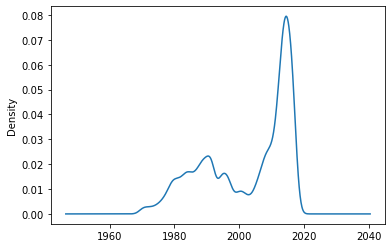

AxesSubplot(0.125,0.125;0.775x0.755)


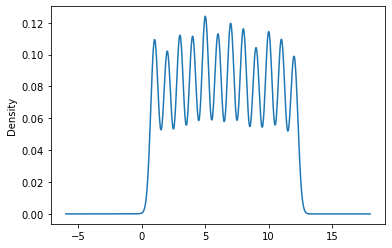

AxesSubplot(0.125,0.125;0.775x0.755)


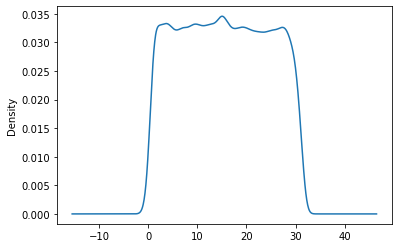

AxesSubplot(0.125,0.125;0.775x0.755)


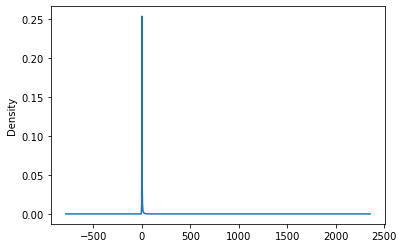

AxesSubplot(0.125,0.125;0.775x0.755)


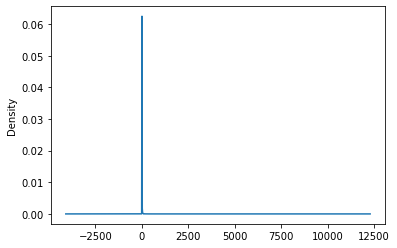

AxesSubplot(0.125,0.125;0.775x0.755)


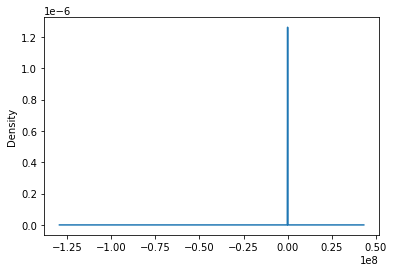

AxesSubplot(0.125,0.125;0.775x0.755)


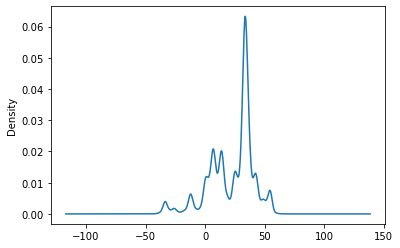

In [38]:
for i in num_data.columns:
    print(num_data[i].plot(kind='kde'))
    plt.show()

## *Check The 'KURTOSIS' of numerical columns*

In [39]:
data1.kurt()

year             -1.043064
month            -1.171516
day              -1.181855
kills          5887.592623
wound         40390.378970
longitude    181690.970895
latitude          0.606361
dtype: float64

# Discovery In Visualization

## *Histogram of data1*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1A28F1160>,
      dtype=object)

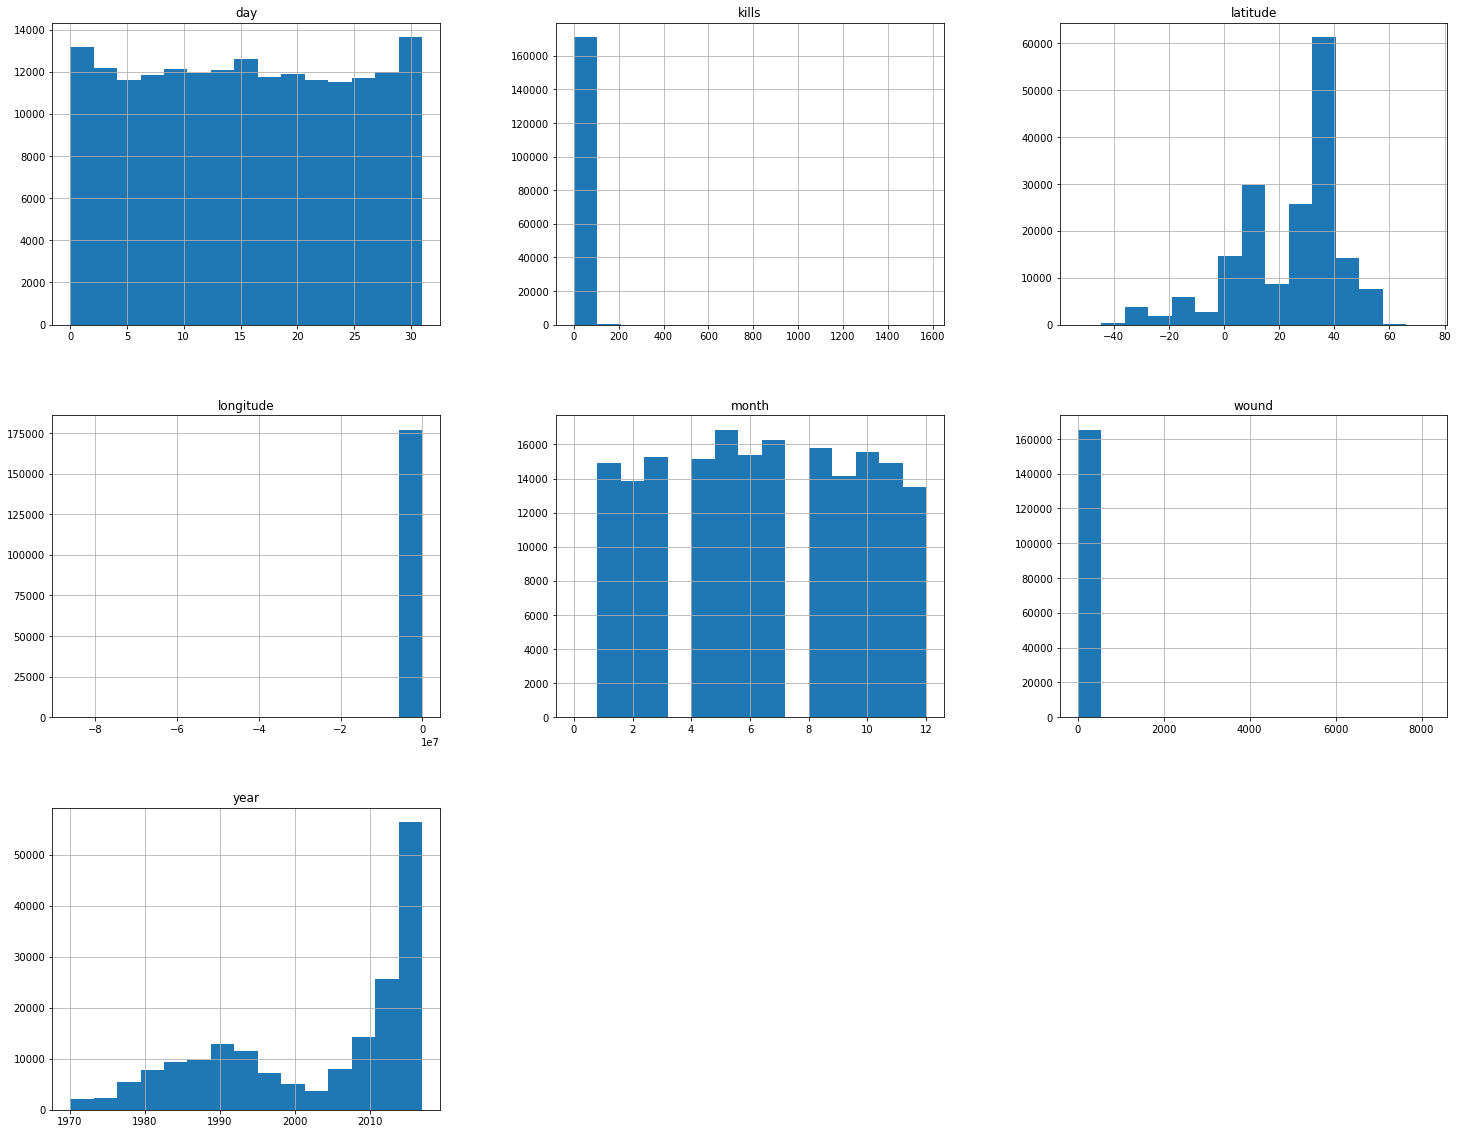

In [10]:
data1.hist(bins=15,figsize=(25,20))

## *Checking Pearson Correlation Matrix*

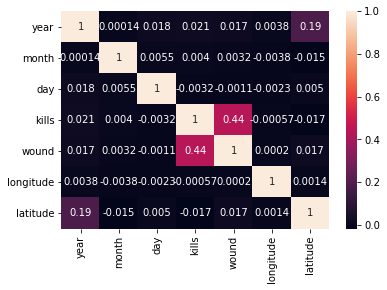

In [45]:
sns.heatmap(data1.corr(),annot=True)

# Year and total No. of attacks

## *Use countplot*

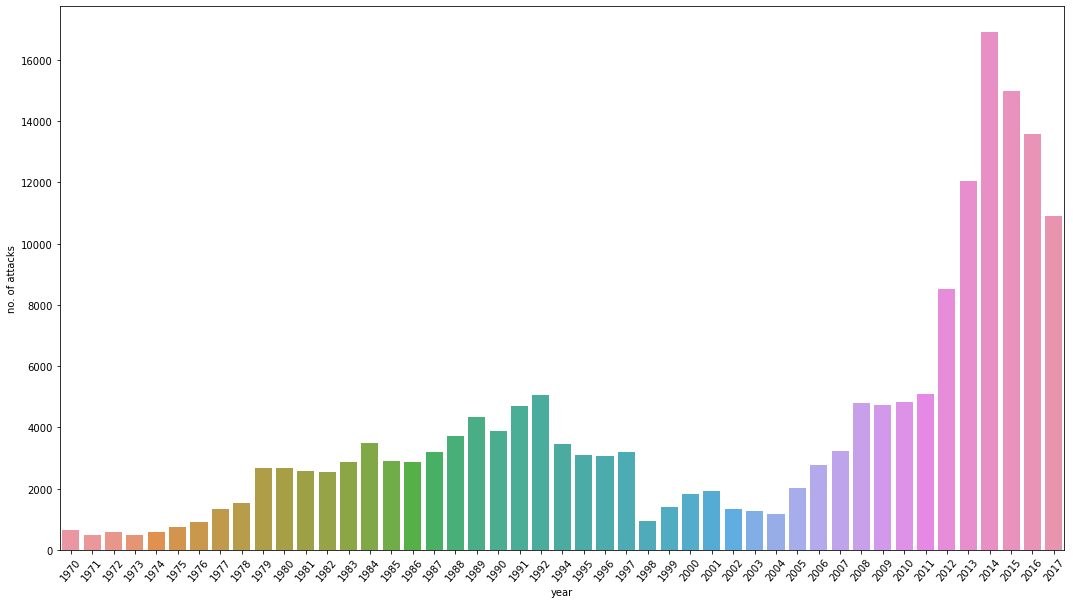

In [46]:
year=data1['year'].unique()
plt.subplots(figsize=(18,10))
sns.countplot(data1['year'])
plt.xticks(rotation=50)  # to rotate label of x axis
plt.xlabel('year')
plt.ylabel('no. of attacks')
plt.show()

## *(OR) Use BARPLOT*

In [47]:
year_count=data1['year'].value_counts(dropna=False).sort_index()
year_count                                 # sort_index() used to sort values of rows 
                                           # sort_values() used to sort values of col

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: year, dtype: int64

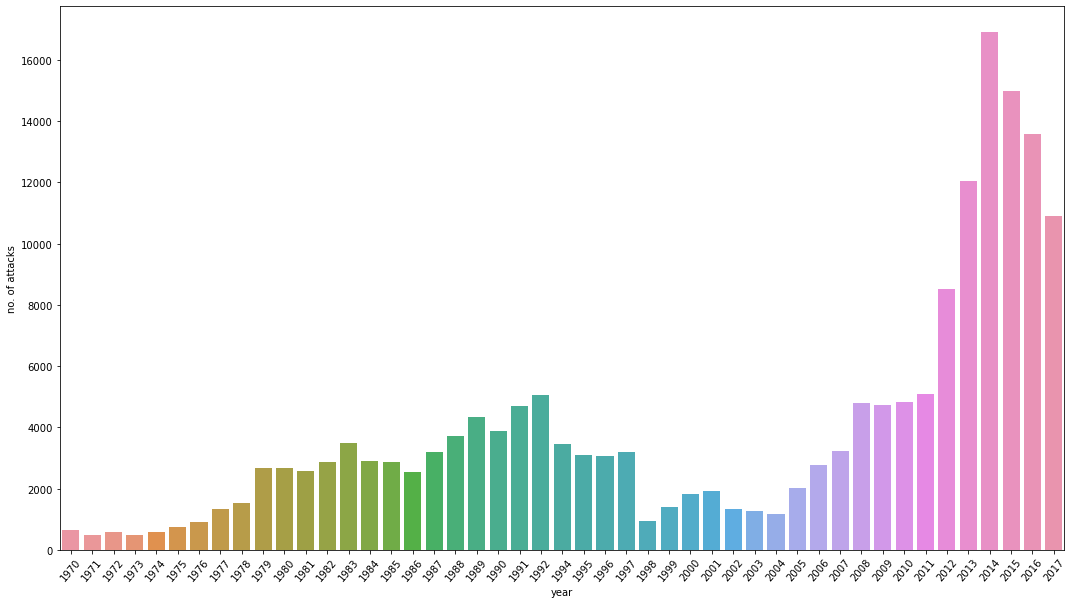

In [48]:
# year vs counts
year=data1['year'].unique()
year_count=data1['year'].value_counts().sort_index()
plt.subplots(figsize=(18,10))
############################################################################
sns.barplot(x=year,y=year_count,data=data1)
plt.xticks(rotation=50)                          # to rotate label of x axis                     
plt.xlabel('year')
plt.ylabel('no. of attacks')
plt.show()

## How to pick only 1st value of index

In [57]:
data1['countries'].value_counts().head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: countries, dtype: int64

In [59]:
data1['countries'].value_counts().head(1)

Iraq    24636
Name: countries, dtype: int64

## OR

In [60]:
data1['countries'].value_counts().idxmax()  

'Iraq'

In [61]:
data1['year'].value_counts().idxmax()  

2014

In [62]:
data1['month'].value_counts().idxmax()  

5

In [63]:
data1['targtype'].value_counts().idxmax()  

'Private Citizens & Property'

In [64]:
data1['regions'].value_counts().idxmax()  

'Middle East & North Africa'

In [65]:
data1['state'].value_counts().idxmax()

'Baghdad'

In [66]:
data1['attacktype'].value_counts().idxmax()

'Bombing/Explosion'

## to extract 2nd value of index

In [67]:
data1['group'].value_counts()

Unknown                                                                       82782
Taliban                                                                        7478
Islamic State of Iraq and the Levant (ISIL)                                    5613
Shining Path (SL)                                                              4555
Farabundo Marti National Liberation Front (FMLN)                               3351
                                                                              ...  
Proletarian Initiative and Offensive for W. Europe                                1
International Proletarian Groups                                                  1
Autonomy (Greece)                                                                 1
Tehrik-e-Nifaz-e-Aman Balochistan-Jhalawan Brigade (TNAB-Jhalawan Brigade)        1
Fight Xenophobia                                                                  1
Name: group, Length: 3537, dtype: int64

In [68]:
data1['group'].value_counts()[1]

7478

In [69]:
data1['group'].value_counts().index[1]

'Taliban'

# Summary of above points

In [70]:
print('the country which have max. attack is =>> ',data1['countries'].value_counts().idxmax())
print('year which have max. attack is =>> ',data1['year'].value_counts().idxmax())
print('the state which have max. attack is =>> ',data1['state'].value_counts().idxmax())
print('most of the attacktypes are  =>> ',data1['attacktype'].value_counts().idxmax())
print('most of the targettypes are  =>> ',data1['targtype'].value_counts().idxmax())
print('the month which have max. attack is =>> ',data1['month'].value_counts().idxmax())
print('the region which have max. attack is =>> ',data1['regions'].value_counts().idxmax())
print('the group which have max. attack is =>> ',data1['group'].value_counts().index[1])

the country which have max. attack is =>>  Iraq
year which have max. attack is =>>  2014
the state which have max. attack is =>>  Baghdad
most of the attacktypes are  =>>  Bombing/Explosion
most of the targettypes are  =>>  Private Citizens & Property
the month which have max. attack is =>>  5
the region which have max. attack is =>>  Middle East & North Africa
the group which have max. attack is =>>  Taliban


# Top countries 15 affected by terror attacks

In [71]:
data['countries'].value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: countries, dtype: int64

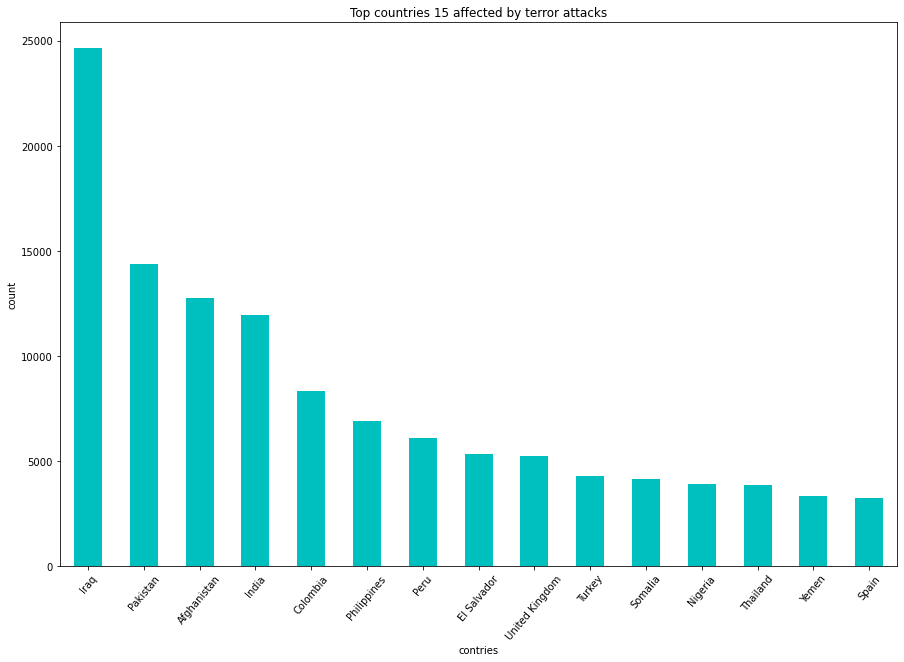

In [96]:
plt.subplots(figsize=(15,10))
data['countries'].value_counts()[:15].plot(kind='bar',color='c')
plt.title('Top countries 15 affected by terror attacks')
plt.xticks(rotation=50)
plt.xlabel('contries')
plt.ylabel('count')
plt.show()

# Terrorist Attacks On Differnt Regions

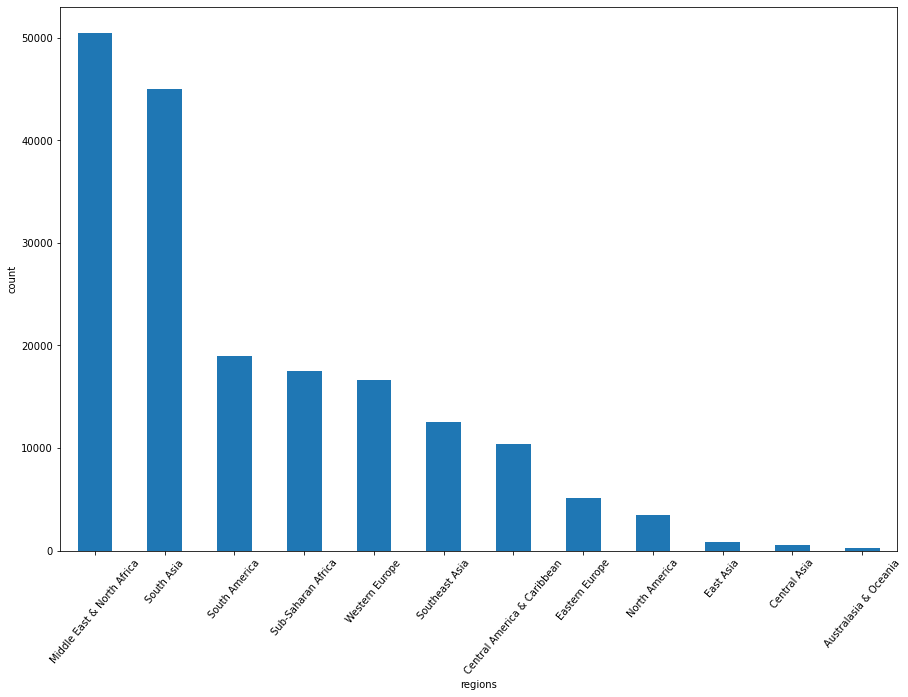

In [73]:
plt.subplots(figsize=(15,10))
data['regions'].value_counts().plot(kind='bar')
plt.xticks(rotation=50)
plt.xlabel('regions')
plt.ylabel('count')
plt.show()

# Top 15 Active Group

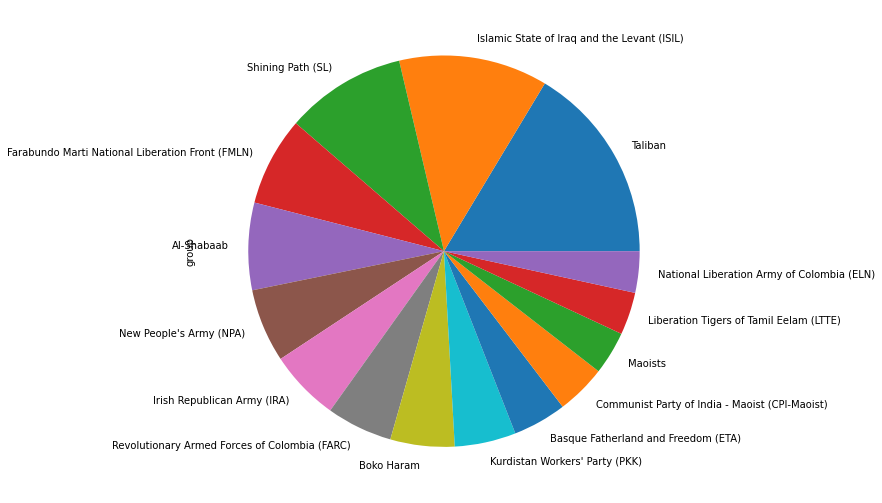

In [75]:
data1['group'].value_counts()[1:16].plot(kind='pie',figsize=(9,9))

## Total No. Of Casualities On The Basis of Attacktype

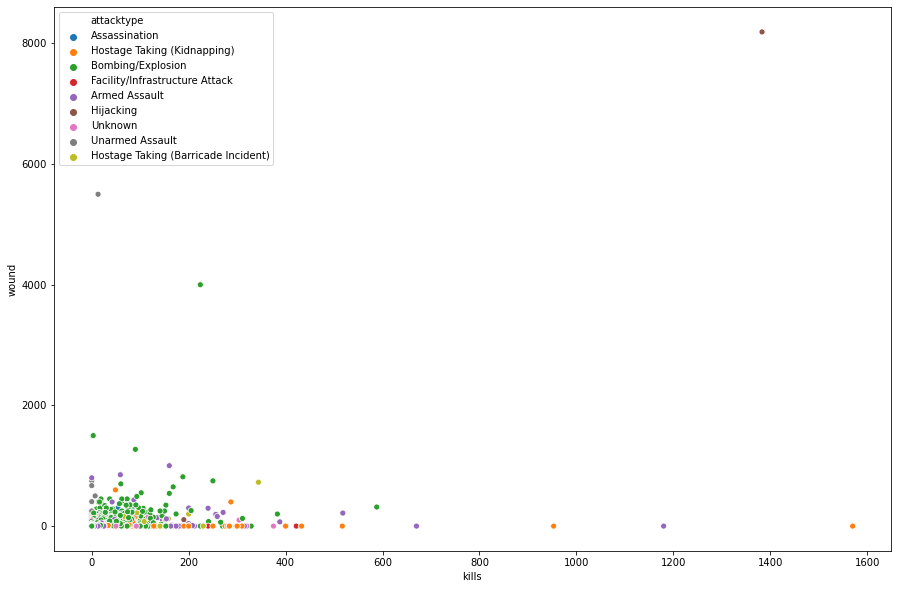

In [76]:
plt.subplots(figsize=(15,10))
sns.scatterplot(x='kills',y='wound',hue='attacktype',data=data1)

## Terrorist Activities By Region in Each Year

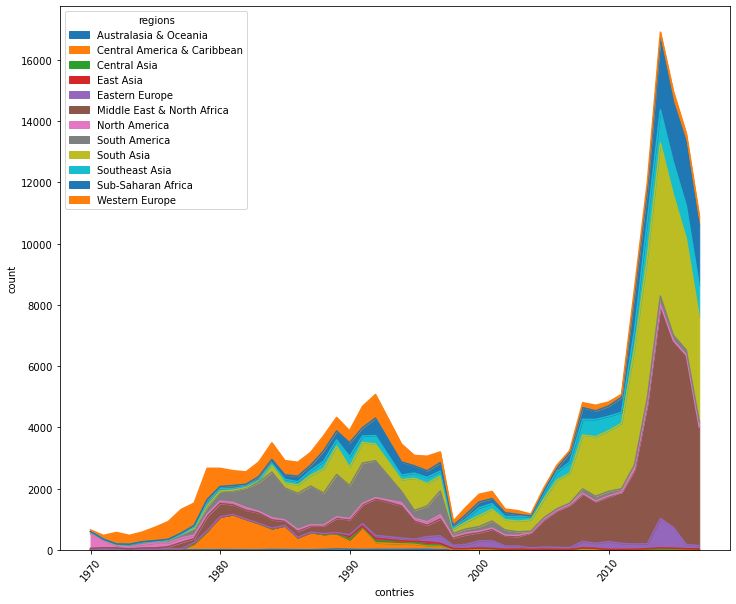

In [77]:
pd.crosstab(data1['year'],data1['regions']).plot(kind='area',figsize=(12,10))
plt.xticks(rotation=50)
plt.xlabel('contries')
plt.ylabel('count')                                 ########################################################################
plt.show()

# Most Target Type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

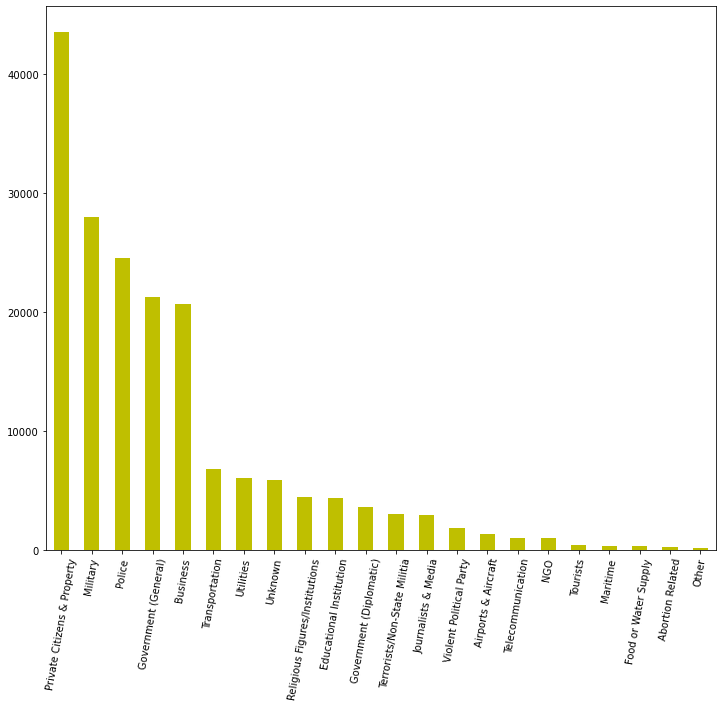

In [78]:
data1['targtype'].value_counts().plot(kind='bar',figsize=(12,10),color='y')
plt.xticks(rotation=80)

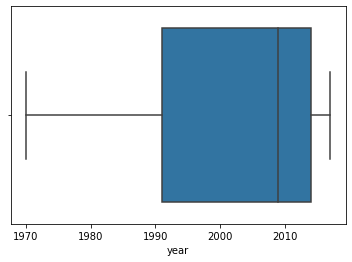

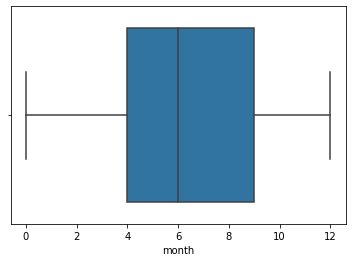

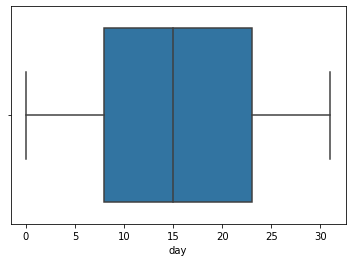

TypeError: unsupported operand type(s) for /: 'str' and 'int'

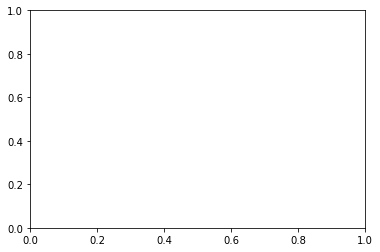

In [82]:
for i in data1.columns:
    sns.boxplot(data1[i])
    plt.show()

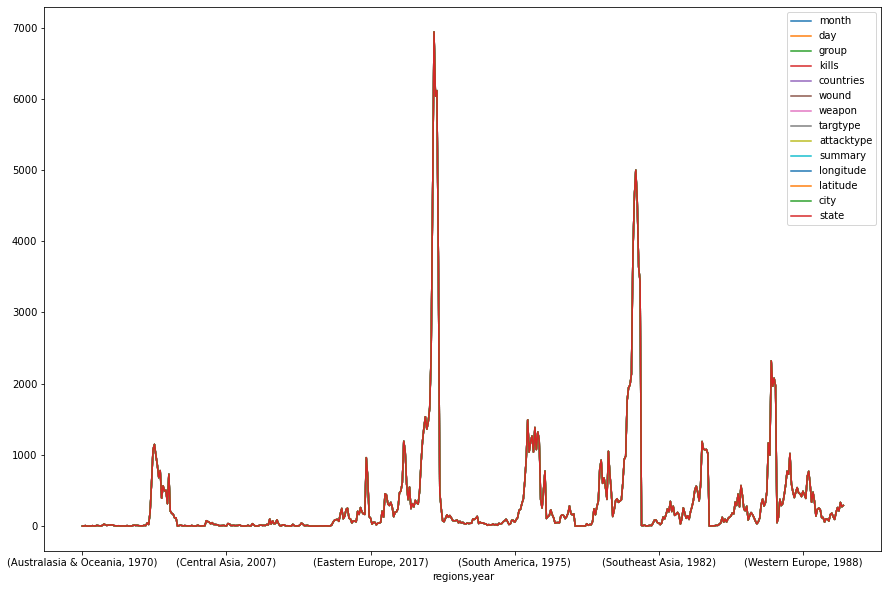

In [88]:
data1.groupby(['regions','year']).count().plot(figsize=(15,10))